# Setup

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Import dos dados

In [2]:
# Dataset dos filmes
df_f_movies = pd.read_csv('fmovies.csv', index_col = False)

In [3]:
df_f_movies.head(1)

,Unnamed: 0,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings
0,0,1.0,Swearnet: The Movie,2014,935,112,swearnetthemovie,132132,Swearnet: The Movie (2014),Comedy,3.1,15


In [4]:
df_f_movies.shape

(132, 12)

In [5]:
df_f_movies.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
df_f_movies.head(1)

,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings
0,1.0,Swearnet: The Movie,2014,935,112,swearnetthemovie,132132,Swearnet: The Movie (2014),Comedy,3.1,15


In [1]:
!ls

Apresentação.ipynb	f_movies.csv  ml-25m	  rating.csv
criação_datasets.ipynb	fmovies.csv   ml-25m.zip


# Distribuição das notas

In [7]:
df_f_movies.head(1)

,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings
0,1.0,Swearnet: The Movie,2014,935,112,swearnetthemovie,132132,Swearnet: The Movie (2014),Comedy,3.1,15


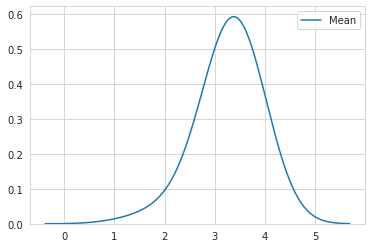

In [9]:
sns.set_style('whitegrid')
sns.kdeplot(df_f_movies['Mean'], bw=0.5)

In [21]:
df_f_movies['Mean'].describe()

count    132.000000
mean       3.284216
std        0.520599
min        1.125000
25%        3.085717
50%        3.335093
75%        3.633288
max        4.188912
Name: Mean, dtype: float64

## Distribuição geral dos ratings

In [11]:
df_ratings = pd.read_csv('rating.csv')

In [13]:
df_ratings = df_ratings[['movieId', 'Mean', 'Count_ratings']]

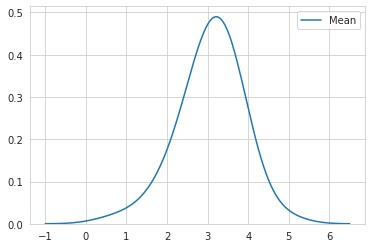

In [14]:
sns.set_style('whitegrid')
sns.kdeplot(df_ratings['Mean'], bw=0.5)

In [22]:
df_ratings['Mean'].describe()

count    59047.000000
mean         3.071374
std          0.739840
min          0.500000
25%          2.687500
50%          3.150000
75%          3.500000
max          5.000000
Name: Mean, dtype: float64

### Comparação das notas

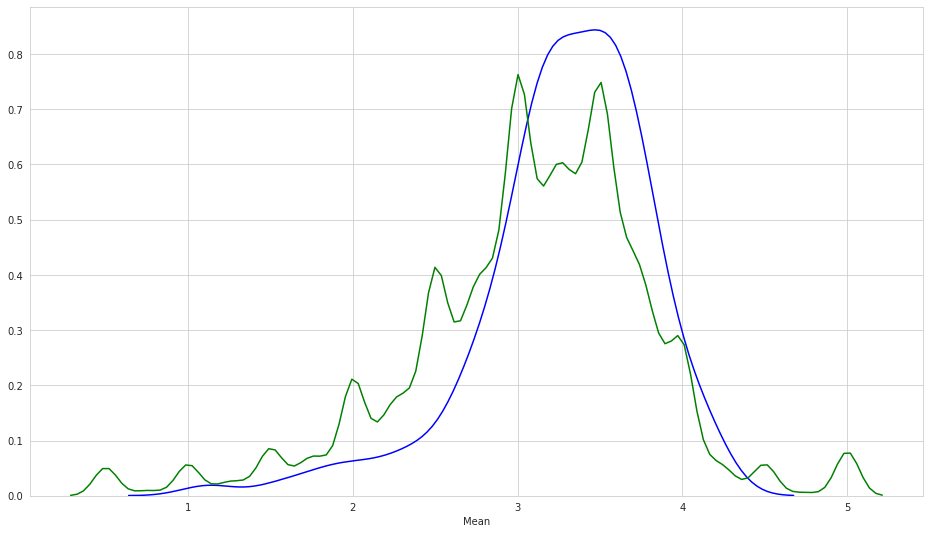

In [25]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

sns.distplot(df_f_movies['Mean'], kde=True, ax = ax, hist=False, bins = 10, color = 'b')# f_movies
sns.distplot(df_ratings['Mean'], kde=True, ax = ax, hist=False, bins = 10, color = 'g')# Filmes gerais

plt.show()

# Relação entre quantidade de vezes que aparece a palavra f*  x rating

In [26]:
df_f_movies.head(10)

,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings
0,1.0,Swearnet: The Movie,2014,935,112,swearnetthemovie,132132,Swearnet: The Movie (2014),Comedy,3.100000,15
1,5.0,Summer of Sam,1999,435,142,summerofsam,2702,Summer of Sam (1999),Drama,3.079622,2964
2,6.0,Nil by Mouth,1997,428,128,nilbymouth,1846,Nil By Mouth (1997),Drama,3.518707,294
3,7.0,Casino,1995,422,178,casino,16,Casino (1995),Crime|Drama,3.823707,18404
4,8.0,Alpha Dog,2006,420,118,alphadog,50442,Alpha Dog (2007),Crime|Drama,3.271728,955
5,9.0,Straight Outta Compton,2015,392,167,straightouttacompton,140715,Straight Outta Compton (2015),Drama,3.694366,1420
6,11.0,Starred Up,2013,337,106,starredup,110110,Starred Up (2013),Drama,3.663580,324
7,12.0,End of Watch,2012,326,109,endofwatch,96811,End of Watch (2012),Crime|Drama|Thriller,3.812533,1915
8,15.0,Twin Town,1997,318,99,twintown,1539,Twin Town (1997),Comedy|Crime,3.104015,274
9,18.0,Martin Lawrence Live: Runteldat,2002,311,113,martinlawrenceliverunteldat,5513,Martin Lawrence Live: Runteldat (2002),Comedy|Documentary,2.345528,123


In [28]:
df_f_movies['f_per_minute'] = df_f_movies['Count']/ df_f_movies['Running time\n(minutes)']

In [29]:
df_f_movies.shape

(132, 12)

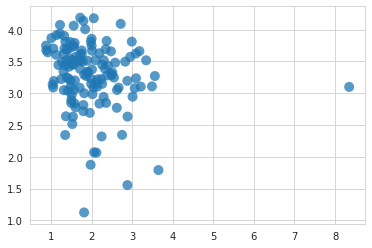

In [38]:
plt.scatter(df_f_movies['f_per_minute'], df_f_movies['Mean'], s=100, cmap=plt.cm.cool, edgecolors='None', alpha=0.75)
plt.show()

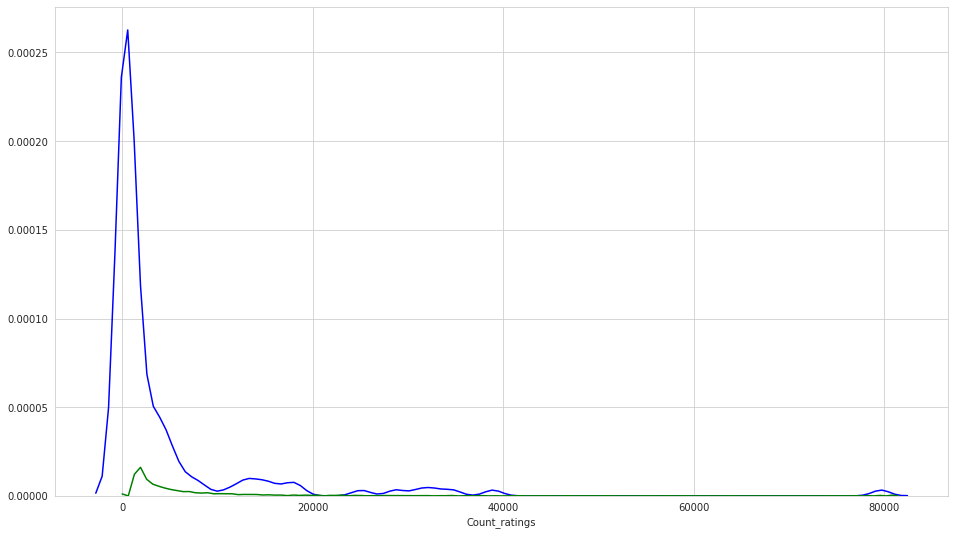

In [60]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

sns.distplot(df_f_movies['Count_ratings'], kde=True, ax = ax, hist=False, bins = 10, color = 'b')# f_movies
sns.distplot(df_ratings['Count_ratings'], kde=True, ax = ax, hist=False, bins = 10, color = 'g')# Filmes gerais

plt.show()

O gráfico acima deixa claro que nos filmes com a palavra f*, a maioria dos filmes teve menos de 20000 avaliações

In [63]:
df_f_movies.head(1)

,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings,f_per_minute,decada,Decada
0,1.0,Swearnet: The Movie,2014,935,112,swearnetthemovie,132132,Swearnet: The Movie (2014),Comedy,3.1,15,8.348214,20.14,10


In [64]:
df_f_movies['prop_avaliacoes'] = (df_f_movies['Count_ratings']/(sum(df_f_movies['Count_ratings']))) * 100

# Relação entre quantidade de vezes que aparece a palavra f* x quantidade de avaliações

In [56]:
df_f_movies.head(10)

,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings,f_per_minute,decada,Decada
0,1.0,Swearnet: The Movie,2014,935,112,swearnetthemovie,132132,Swearnet: The Movie (2014),Comedy,3.100000,15,8.348214,20.14,10
1,5.0,Summer of Sam,1999,435,142,summerofsam,2702,Summer of Sam (1999),Drama,3.079622,2964,3.063380,19.99,90
2,6.0,Nil by Mouth,1997,428,128,nilbymouth,1846,Nil By Mouth (1997),Drama,3.518707,294,3.343750,19.97,90
3,7.0,Casino,1995,422,178,casino,16,Casino (1995),Crime|Drama,3.823707,18404,2.370787,19.95,90
4,8.0,Alpha Dog,2006,420,118,alphadog,50442,Alpha Dog (2007),Crime|Drama,3.271728,955,3.559322,20.06,00
5,9.0,Straight Outta Compton,2015,392,167,straightouttacompton,140715,Straight Outta Compton (2015),Drama,3.694366,1420,2.347305,20.15,10
6,11.0,Starred Up,2013,337,106,starredup,110110,Starred Up (2013),Drama,3.663580,324,3.179245,20.13,10
7,12.0,End of Watch,2012,326,109,endofwatch,96811,End of Watch (2012),Crime|Drama|Thriller,3.812533,1915,2.990826,20.12,10
8,15.0,Twin Town,1997,318,99,twintown,1539,Twin Town (1997),Comedy|Crime,3.104015,274,3.212121,19.97,90
9,18.0,Martin Lawrence Live: Runteldat,2002,311,113,martinlawrenceliverunteldat,5513,Martin Lawrence Live: Runteldat (2002),Comedy|Documentary,2.345528,123,2.752212,20.02,00


In [57]:
df_f_movies.shape

(132, 14)

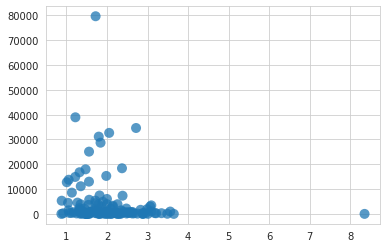

In [58]:
plt.scatter(df_f_movies['f_per_minute'], df_f_movies['Count_ratings'], s=100, cmap=plt.cm.cool, edgecolors='None', alpha=0.75)
plt.show()

# Número de filmes x Ano

In [45]:
df_f_movies['Year'].describe()

count     132.000000
mean     2004.795455
std         9.182408
min      1978.000000
25%      1998.000000
50%      2004.500000
75%      2012.250000
max      2022.000000
Name: Year, dtype: float64

In [52]:
df_f_movies['Decada'] = np.where((df_f_movies['Year'] > 1970) & (df_f_movies['Year'] < 1980), '70',
                                np.where((df_f_movies['Year'] >= 1980) & (df_f_movies['Year'] < 1990), '80',
                                np.where((df_f_movies['Year'] >= 1990) & (df_f_movies['Year'] < 2000), '90',
                                np.where((df_f_movies['Year'] >= 2000) & (df_f_movies['Year'] < 2010), '00',
                                np.where((df_f_movies['Year'] >= 2010) & (df_f_movies['Year'] < 2020), '10',
                                np.where((df_f_movies['Year'] >= 2020), '20', 'null'))))))

In [53]:
df_f_movies['Decada'].value_counts()

00    45
10    42
90    35
80     6
20     3
70     1
Name: Decada, dtype: int64

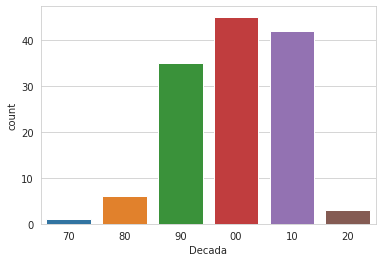

In [55]:
sns.countplot(x= df_f_movies['Decada'], order = ['70', '80', '90', '00', '10', '20'])

In [65]:
df_f_movies.sort_values(by = 'prop_avaliacoes', ascending = False).head(10)

,Rank,Film,Year,Count,Running time\n(minutes),title_processed,movieId,title,genres,Mean,Count_ratings,f_per_minute,decada,Decada,prop_avaliacoes
22,38.0,Pulp Fiction,1994,265,154,pulpfiction,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672,1.720779,19.94,90,14.365747
92,148.0,Good Will Hunting,1997,154,126,goodwillhunting,1704,Good Will Hunting (1997),Drama|Romance,4.074935,38947,1.222222,19.97,90,7.022577
21,37.0,Reservoir Dogs,1992,269,99,reservoirdogs,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,4.092294,34634,2.717172,19.92,90,6.244895
11,20.0,Goodfellas,1990,300,146,goodfellas,1213,Goodfellas (1990),Crime|Drama,4.180525,32663,2.054795,19.90,90,5.889502
40,62.0,American History X,1998,214,119,americanhistoryx,2329,American History X (1998),Crime|Drama,4.140001,31157,1.798319,19.98,90,5.617953
59,99.0,Trainspotting,1996,175,95,trainspotting,778,Trainspotting (1996),Comedy|Crime|Drama,4.007665,28702,1.842105,19.96,90,5.175289
83,134.0,Snatch,2000,159,102,snatch,4011,Snatch (2000),Comedy|Crime|Thriller,4.063324,25101,1.558824,20.00,00,4.525989
3,7.0,Casino,1995,422,178,casino,16,Casino (1995),Crime|Drama,3.823707,18404,2.370787,19.95,90,3.318446
71,117.0,District 9,2009,165,112,district,70286,District 9 (2009),Mystery|Sci-Fi|Thriller,3.806483,17970,1.473214,20.09,00,3.240191
82,133.0,Platoon,1986,159,120,platoon,1090,Platoon (1986),Drama|War,3.903608,16796,1.325000,19.86,80,3.028505


In [67]:
df_prop = df_f_movies[['Decada', 'prop_avaliacoes']].groupby(by = 'Decada').sum()
df_prop.reset_index(inplace= True)
df_prop

,Decada,prop_avaliacoes
0,00,23.334061
1,10,5.306376
2,20,0.040029
3,70,0.057159
4,80,8.085150
5,90,63.177226


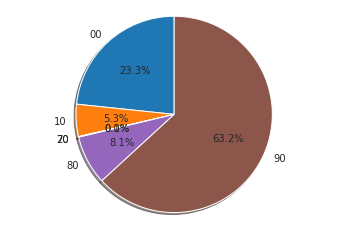

In [68]:
fig1, ax1 = plt.subplots()
ax1.pie(df_prop['prop_avaliacoes'], labels= df_prop['Decada'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [69]:
df_prop_decada = df_f_movies[['Decada', 'movieId']].groupby(by = 'Decada').count()
df_prop_decada.reset_index(inplace= True)
df_prop_decada

,Decada,movieId
0,00,45
1,10,42
2,20,3
3,70,1
4,80,6
5,90,35


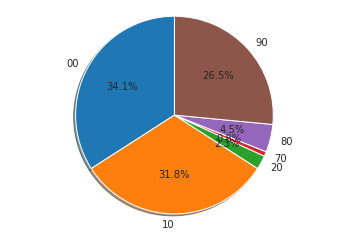

In [70]:
fig1, ax1 = plt.subplots()
ax1.pie(df_prop_decada['movieId'], labels= df_prop_decada['Decada'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()